In [1]:
import torch
import tqdm
import numpy as np
from sklearn.manifold import TSNE
from torchvision import datasets, models, transforms
from vgg_face import *
from FAUDataset import *
import matplotlib.pyplot as plt

c:\Users\Yuan\anaconda3\envs\pytorch\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\Yuan\anaconda3\envs\pytorch\lib\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: [WinError 127] The specified procedure could not be found
  warn(f"Failed to load image Python extension: {e}")


In [3]:
def plot_loss(contents):
    train_loss_list = []
    for i in range(len(contents)):
        if 'train_loss' in contents[i]:
            train_loss_list.append(float(contents[i][contents[i].index(':')+1:]))

    test_loss_list = []
    for i in range(len(contents)):
        if 'test_loss' in contents[i]:
            test_loss_list.append(float(contents[i][contents[i].index(':')+1:]))
    plt.plot(test_loss_list, label='test')
    plt.plot(train_loss_list, label='train')
    plt.ylabel('MSE loss')
    plt.title('General Loss')
    plt.ylim([0, 0.05])
    plt.legend()
    plt.show()

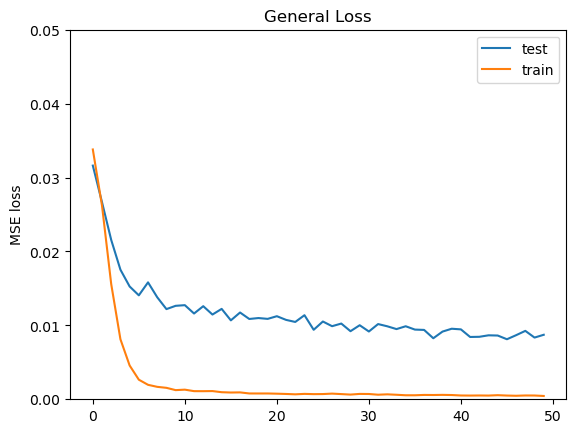

In [5]:
with open('D:/GitHub/FAU_Dataset/code/results_r66/results.txt') as f:
    lines = f.readlines()
plot_loss(lines)

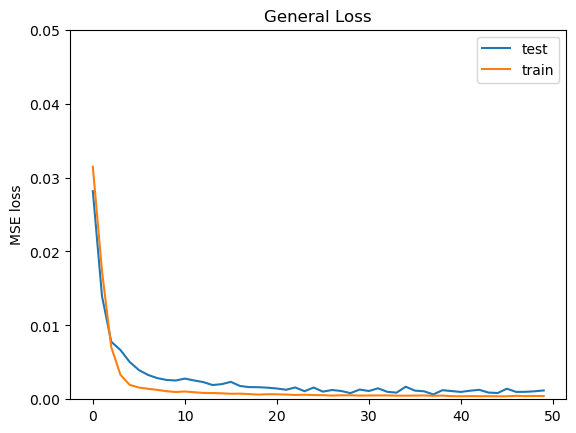

In [6]:
with open('D:/GitHub/FAU_Dataset/code/results_r82/results.txt') as f:
    lines = f.readlines()
plot_loss(lines)

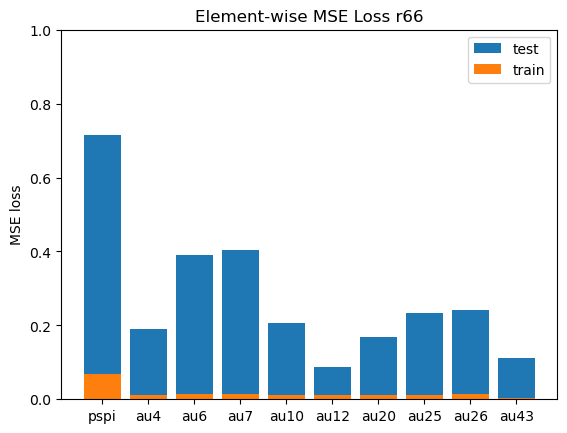

In [12]:
aus = ['pspi', 'au4', 'au6', 'au7', 'au10', 'au12', 'au20', 'au25', 'au26', 'au43']
train_mse_aus = [0.0676679, 0.01097045, 0.01296659, 0.01536401, 0.01177868, 0.01214748, 0.01171816, 0.0121143, 0.01373111, 0.00284729]
test_mse_aus = [0.71537631, 0.18964844, 0.39081155, 0.40517712, 0.20770589, 0.08648273, 0.1682063, 0.23408949, 0.24242886, 0.11181538]
plt.bar(aus, test_mse_aus, label='test')
plt.bar(aus, train_mse_aus, label='train')
plt.ylabel('MSE loss')
plt.title('Element-wise MSE Loss r66')
plt.ylim([0, 1])
plt.legend()
plt.show()

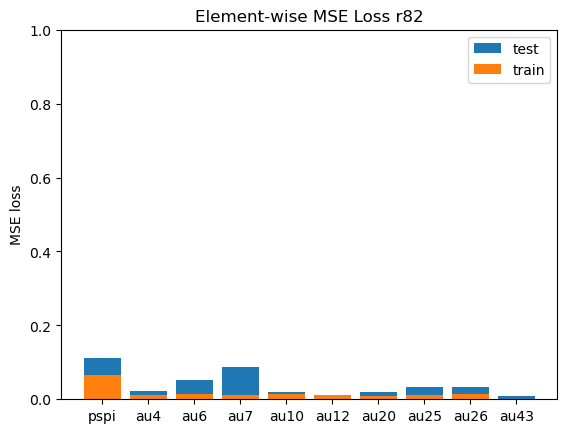

In [11]:
aus = ['pspi', 'au4', 'au6', 'au7', 'au10', 'au12', 'au20', 'au25', 'au26', 'au43']
train_mse_aus = [0.06687088, 0.01256855, 0.01419177, 0.01186881, 0.01390943, 0.0112457, 0.00967603, 0.0120435, 0.01408011, 0.00173172]
test_mse_aus = [0.11142459, 0.02250233, 0.05091965, 0.0870474, 0.01849649, 0.00908172, 0.02051324, 0.03424237, 0.03312092, 0.00790383]
plt.bar(aus, test_mse_aus, label='test')
plt.bar(aus, train_mse_aus, label='train')
plt.ylabel('MSE loss')
plt.title('Element-wise MSE Loss r82')
plt.ylim([0, 1])
plt.legend()
plt.show()